In [ ]:
!pip install torch scikit-learn

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as snb
from tqdm import tqdm_notebook
import time
from IPython.display import HTML
from sklearn.datasets import make_blobs
import torch

In [ ]:
torch.manual_seed(0)

In [ ]:
my_camp = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','green'])

In [ ]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=42, return_centers=False)

In [ ]:
data.shape, labels.shape

((1000, 2), (1000,))

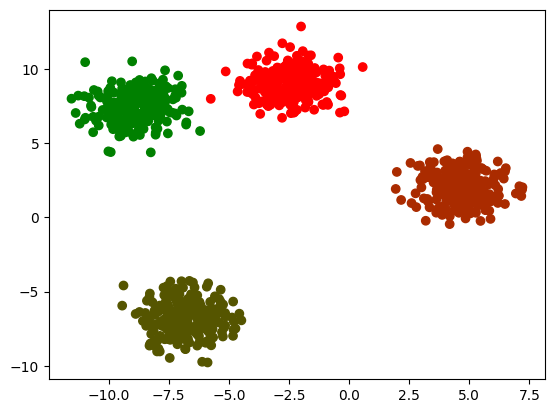

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_camp)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = map(torch.tensor,(train_test_split(data, labels, random_state=42,stratify=labels)))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([750, 2]),
 torch.Size([250, 2]),
 torch.Size([750]),
 torch.Size([250]))

In [ ]:
def model(x):
  a1 = torch.matmul(x,weights1) + bias1
  h1 = torch.sigmoid(a1)
  a2 = torch.matmul(h1,weights2) + bias2
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

In [ ]:
y_hat = torch.tensor([[0.1,0.2,0.3,0.4],[0.8,0.1,0.05,0.05]])
y = torch.tensor([2,0])

(-y_hat[range(y_hat.shape[0]), y].log()).mean().item() # loss function
(torch.argmax(y_hat,dim=1) == y).float().mean().item() # accuracy function

0.5

In [ ]:
def loss_fn(y_hat,y):
  return (-y_hat[range(y_hat.shape[0]), y].log()).mean()

In [ ]:
def accuracy(y_hat,y):
  return (torch.argmax(y_hat,dim=1) == y).float().mean()

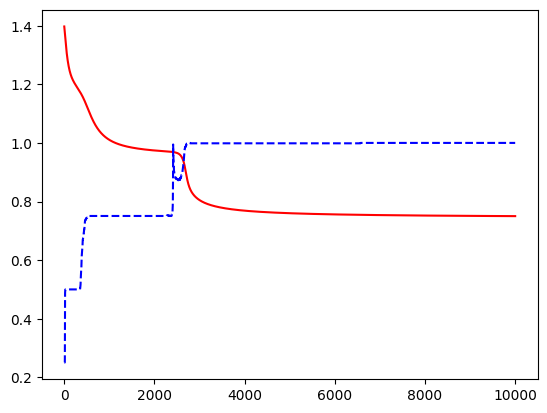

Loss before training 1.3973805904388428
Loss after training 0.7501326203346252


In [ ]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)
weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)
learning_rate = 0.2
epochs = 10000
X_train = X_train.float()
Y_train = y_train.long()
loss_arr = []
acc_arr = []
for epoch in range(epochs):
 y_hat = model(X_train)
 loss = loss_fn(y_hat, Y_train)
 loss.backward()
 loss_arr.append(loss.item())
 acc_arr.append(accuracy(y_hat, Y_train))
 with torch.no_grad():
   weights1 -= weights1.grad * learning_rate
   bias1 -= bias1.grad * learning_rate
   weights2 -= weights2.grad * learning_rate
   bias2 -= bias2.grad * learning_rate
   weights1.grad.zero_()
   bias1.grad.zero_()
   weights2.grad.zero_()
   bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b--')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

Using NN.Functional

In [ ]:
import torch.nn.functional as F

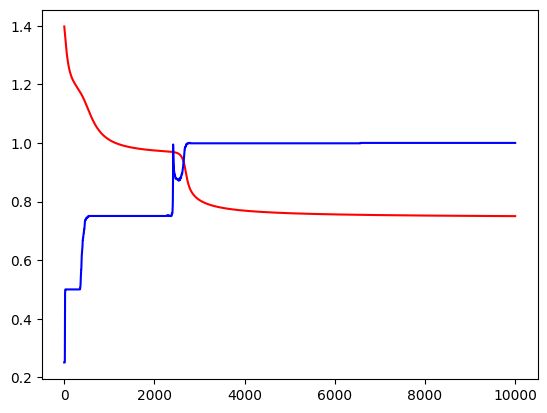

Loss before training 1.3973805904388428
Loss after training 0.7501326203346252


In [ ]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)
weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)
learning_rate = 0.2
epochs = 10000
loss_arr = []
acc_arr = []
for epoch in range(epochs):
 y_hat = model(X_train)
 loss = F.cross_entropy(y_hat, Y_train)
 loss.backward()
 loss_arr.append(loss.item())
 acc_arr.append(accuracy(y_hat, Y_train))
 with torch.no_grad():
   weights1 -= weights1.grad * learning_rate
   bias1 -= bias1.grad * learning_rate
   weights2 -= weights2.grad * learning_rate
   bias2 -= bias2.grad * learning_rate
   weights1.grad.zero_()
   bias1.grad.zero_()
   weights2.grad.zero_()
   bias2.grad.zero_()
plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

Using NN.Parameter

In [ ]:
import torch.nn as nn

In [ ]:
class FirstNetwork(nn.Module):
 def __init__(self):
   super().__init__()
   torch.manual_seed(0)
   self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
   self.bias1 = nn.Parameter(torch.zeros(2))
   self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
   self.bias2 = nn.Parameter(torch.zeros(4))

 def forward(self, X):
   a1 = torch.matmul(X, self.weights1) + self.bias1
   h1 = a1.sigmoid()
   a2 = torch.matmul(h1, self.weights2) + self.bias2
   h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
   return h2

In [ ]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    loss.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

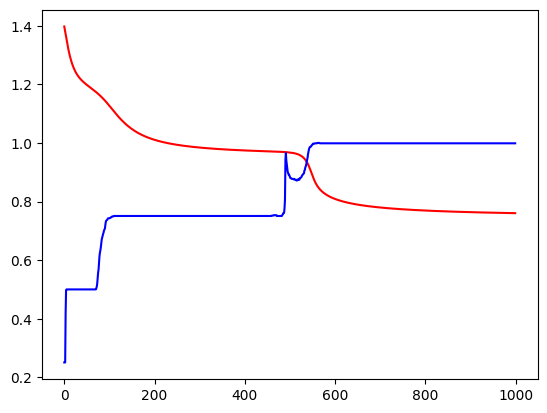

Loss before training 1.3973805904388428
Loss after training 0.7602363228797913


In [ ]:
fn = FirstNetwork()
fit()

Using NN.Linear and Optim

In [ ]:
class FirstNetwork_v1(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2)
    self.lin2 = nn.Linear(2, 4)

  def forward(self, X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [ ]:
fn = FirstNetwork_v1()
fit()

In [ ]:
from torch import optim

In [ ]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

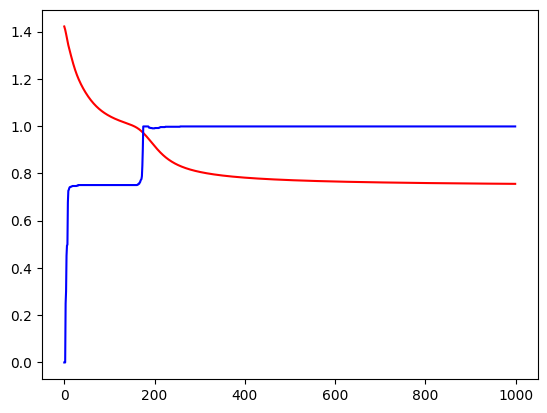

Loss before training 1.421607255935669
Loss after training 0.7557789087295532


In [ ]:
fn = FirstNetwork_v1()
fit_v1()

Using NN.Sequential

In [ ]:
class FirstNetwork_v2(nn.Module):
 def __init__(self):
  super().__init__()
  torch.manual_seed(0)
  self.net = nn.Sequential(
  nn.Linear(2, 2),
  nn.Sigmoid(),
  nn.Linear(2, 4),
  nn.Softmax()
 )
 def forward(self, X):
  return self.net(X)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


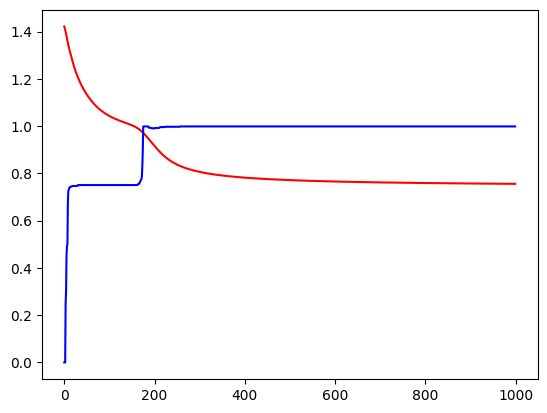

Loss before training 1.421607255935669
Loss after training 0.7557789087295532


In [ ]:
fn = FirstNetwork_v2()
fit_v1()

In [ ]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
 for epoch in range(epochs):
   loss = loss_fn(model(x), y)
   loss.backward()
   opt.step()
   opt.zero_grad()

 return loss.item()

In [ ]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.7557789087295532

Running it on GPUs

In [ ]:
device = torch.device("cuda")
X_train=X_train.to(device)
Y_train=y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.4216071367263794
Time taken 0.9095468521118164


In [ ]:
class FirstNetwork_v3(nn.Module):
 def __init__(self):
   super().__init__()
   torch.manual_seed(0)
   self.net = nn.Sequential(
       nn.Linear(2, 1024*4),
       nn.Sigmoid(),
       nn.Linear(1024*4, 4),
       nn.Softmax()
   )
 def forward(self, X):
   return self.net(X)

In [ ]:
device = torch.device("cpu")
X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3742953538894653
Time taken 27.90336012840271


 Exercises
 1. Try out a deeper neural network, eg. 2 hidden layers
 2. Try out different parameters in the optimizer (eg. try momentum, nestrov) -> check
 optim.SGD docs
 3. Try out other optimization methods (eg. RMSProp and Adam) which are supported
 in
optim
 4. Try out different initialisation methods which are supported in
nn.ini